# MATH2319 Machine Learning Project Phase 2

## Project Title：Revenue Prediction in Online Advertising - 2019, semester 1
#### Team members: 
- Shel Nee Gan (s3746473)
- Hongli Li (s3697150)

## Objective 
The objective of this project is to fit and compare three different regressors (target feature is continuous) to predict the revenue value for each web traffic record using the online advertising dataset. We train three machine learning algorithms (kNN, DT, RF) to learn the pattern of the data and then predict the values of the revenue. The best performing algorithm will be identified by comparing the predictive accuracy, which can be reflected by a lowest RMSE. 

## 1. Introduction

This online advertising dataset provided by Kaggle has been cleaned and pre-processed in phase 1 of the project. An outline of this report is as follow. Section 2 describes a detailed methodology for the whole project. Furthermore, some adjustments of the dataset are made in section 2 to further pre-process the training data in order to boost the learning capacity of the chosen machine learning algorithms.  For each of the three algorithms, each sub-section of section 3 accordingly narrates the detailed process of feature selection, hyperparameter tunning and performance analysis. Section 4 conducts model performance comparison between three algorithms, the paired-t statistical test and also different validation strategies to make the most accurate algorithm convincible. Section 5 discusses the strengths and weaknesses of our approach and possible solutions. Lastly, section 6 provices a brief summary of the findings of this project and recommonded approach for automatic prediction of the future revenue.


## 2. Methodology Overview


In this project, since the target feature in the data set is numeric, we chose the K Nearest Neighbours (kNN) regressor, Decision Tree (DT) regressor and the Random Forest (RF) regressor algorithms to learn the training data and then predict for the test data. For the tree-based algorithms (DT and RF), we used the unscaled data. For the kNN algorithm, we used the MinMaxScaler transformed data since kNN works much better on Normalised data. The dataset has been split into training set and test set by a ration of 8:2, this gives a training set of 4000 rows and a test set of 1000 rows of data. During tunning, to meet the capacity of our laptops, we take a subset of 5000 rows from the full data set to work with. 

We select several important features by the Random Forest Importance method. We considered subsets of 5, 10 and 20 features (the full set is 20 features) and finally, the pipeline process suggests the best algorithms performance is given by when 20 features are selected, except for decision tree regressor which performs the best when 10 features are selected. 

The pipeline process also includes the hyperparameter search for each regressor algorithm. We intended to use 5-fold cross validation with 3 repetitions throughout the project, to minimise the overfitting issue. But in the experiments, we used the 3-fold cross validation with no repetition because this is the only way that can work and produce results from our laptops. The optimal values for each hyperparameter of each regressor have been selected by the pipeline, using the negative mean squared error as the performance metric. The lowest mean squared error gives the best model for a given regressor algorithm. After the three regressors are trained by the optimal parameter values, we conduct a 10-fold cross validation on the test data set when evaluating the predictive power of the regressors. The performance of the kNN regressor, decision tree regressor and the random forest regressor are compared and evaluated under the RMSE metric. For any difference in the RMSE value, we used paired T-test to conclude whether that difference is statistically significant, from there we conclude the best performing regressor is the random forest with the lowest RMSE value.



### Further Data Preparation<a class="anchor" id="3"></a> 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import io

In [2]:
#Load the cleaned data
clean = pd.read_csv('clean_data.csv') 
clean.head()

,Unnamed: 0,companyId,countryId,deviceType,day,dow,price1,price2,price3,ad_area,...,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5,y
0,0,95,234,1,1,5,0.11,0.30,0.6000,7.5000,...,4350,0.6291,0.0011,0.0557,0.8630,0.4811,0.0646,0.3097,0.6257,0.250111
1,1,43,57,2,1,5,0.00,0.00,0.0000,24.2500,...,1023,0.1887,0.0039,0.4495,1.0000,0.6109,1.0000,0.0000,0.0000,0.816571
2,2,43,57,2,1,5,0.78,1.10,2.1786,24.2500,...,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.035484
3,3,43,57,2,1,5,0.78,1.10,2.1786,24.2500,...,1038,0.5028,0.0019,0.1883,0.6474,0.9595,1.0000,0.0000,0.0000,0.351807
4,4,43,29,2,1,5,4.56,4.56,4.5626,0.0001,...,27,0.0093,0.4444,0.8750,1.0000,1.0000,1.0000,0.0000,0.0000,0.067901


In [3]:
# drop the meaningless column called "Unnamed"
clean = clean.iloc[:,1:22] 
clean.head()

,companyId,countryId,deviceType,day,dow,price1,price2,price3,ad_area,ad_ratio,...,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5,y
0,95,234,1,1,5,0.11,0.30,0.6000,7.5000,0.83333,...,4350,0.6291,0.0011,0.0557,0.8630,0.4811,0.0646,0.3097,0.6257,0.250111
1,43,57,2,1,5,0.00,0.00,0.0000,24.2500,0.25773,...,1023,0.1887,0.0039,0.4495,1.0000,0.6109,1.0000,0.0000,0.0000,0.816571
2,43,57,2,1,5,0.78,1.10,2.1786,24.2500,0.25773,...,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.035484
3,43,57,2,1,5,0.78,1.10,2.1786,24.2500,0.25773,...,1038,0.5028,0.0019,0.1883,0.6474,0.9595,1.0000,0.0000,0.0000,0.351807
4,43,29,2,1,5,4.56,4.56,4.5626,0.0001,1.00000,...,27,0.0093,0.4444,0.8750,1.0000,1.0000,1.0000,0.0000,0.0000,0.067901


In [4]:
# check again the data structures, 
clean.dtypes 

companyId        int64
countryId        int64
deviceType       int64
day              int64
dow              int64
price1         float64
price2         float64
price3         float64
ad_area        float64
ad_ratio       float64
requests         int64
impression       int64
cpc            float64
ctr            float64
viewability    float64
ratio1         float64
ratio2         float64
ratio3         float64
ratio4         float64
ratio5         float64
y              float64
dtype: object

All features are numerical now and ready for any transformation and regressor algorithm.

In [5]:
# The dimension is correct, the orginal dataset minus one "case_id" column, as case_id carries no information
clean.shape 

(214128, 21)

In [6]:
#make sure there is no missing values
clean.isna().sum()

companyId      0
countryId      0
deviceType     0
day            0
dow            0
price1         0
price2         0
price3         0
ad_area        0
ad_ratio       0
requests       0
impression     0
cpc            0
ctr            0
viewability    0
ratio1         0
ratio2         0
ratio3         0
ratio4         0
ratio5         0
y              0
dtype: int64

### Summary Statistics

In [7]:
clean.describe(include = 'all')

,companyId,countryId,deviceType,day,dow,price1,price2,price3,ad_area,ad_ratio,...,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5,y
count,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,...,2.141280e+05,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000,214128.000000
mean,73.332988,119.496180,1.875612,15.790522,3.103737,0.438229,0.630178,0.932436,4.724445,0.923402,...,5.585714e+03,0.177862,0.032921,0.377929,0.558284,0.491079,0.311646,0.131008,0.188300,0.847004
std,47.817556,76.129206,0.787796,8.385557,2.035861,1.281403,1.481552,1.839991,6.273410,0.482055,...,9.871334e+04,0.707260,0.092502,0.365938,0.446955,0.414312,0.444088,0.239758,0.297121,1.390593
min,40.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.083330,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098
25%,43.000000,56.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000100,0.833330,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150415
50%,43.000000,102.000000,2.000000,16.000000,3.000000,0.010000,0.090000,0.294800,0.000100,1.000000,...,9.900000e+01,0.015700,0.001700,0.331500,0.750000,0.627100,0.027600,0.000000,0.000000,0.419000
75%,95.000000,197.000000,2.000000,23.000000,5.000000,0.190000,0.570000,0.985650,7.500000,1.000000,...,1.058000e+03,0.125200,0.012000,0.715900,1.000000,0.895700,1.000000,0.163600,0.384700,0.959048
max,159.000000,251.000000,5.000000,30.000000,6.000000,14.690000,63.120000,78.900000,36.000000,5.000000,...,6.100324e+06,132.533900,2.000000,7.000000,1.000000,1.027000,1.500000,1.076900,1.200000,47.060000


### Partitioning dataset into the set of descriptive features and the target feature

In [8]:
#create a dataset with the set of descriptive features and name it "data"
Data = clean.drop(columns='y')

In [9]:
#remove target feature form the descriptive feature set and name it "target"
Target = clean['y']

In [10]:
#make a copy of the original data
Data_unscaled = Data.copy()

### 2.1 Scaling of features

In this project, both scaled and unscaled data will be used to train the machine learning algorithms. MinMax Scaler and the Standard Scaler will be considered for the k Nearest Neighbour algorithm and unscaled data will be used for the Decision Tree and Random Forest algorithms. The reason for this is when using the Euclidean distance of the k Nearest Neighbour, the distance is sensitive to magnitudes and hence all features should be transformed to a comparable scale, whereas the tree-based models are not depending on the distance, and can handle different range of feature values, so original (unscaled) data will used to train the both Decision Tree and Random Forest [8]. This is implemented by separately storing the transformation and unscaled data into different objects, so choose the correct data before training the learner algorithms. Another advantage of storing the scaler object is that, before predicting new data, the stored scaler allows the new data to undergo same transformation as the training data [4]. After that, the predicted values are also able to be transformed back to the original scale using the inverse_transform function.


Due to only some of the columns in the original dataset has been normalised, for example, there are still features like ‘requests’ ranges from 0 to 6701924; ‘price3’  ranges from 0 to 78.9, ‘ad_area’ ranges 0 to 35, ‘ratio3’ ranges 0 to 1.5 and ‘companyId’ ranges from 40 to 159, the target feature ‘y’ (revenue) ranges from 0 to 47.06. Since all of these features are not in a consistent scale, MinMax scaler will be applied to put all features on the same baseline, in order to produce better learning result by the distance-based algorithm.


The MinMax Scaler returns feature values between zero and one by subtracting the minimum then divided by the difference between the maximum and minimum feature values. MinMax Scaler is chosen as the default transformation on data because it preserves the original shape of the data distribution and hence the information contained in the original data is also preserved [7].

In [11]:
#perfrom a min-max scaling of the descriptive features
Data_scaler = preprocessing.MinMaxScaler().fit_transform(Data)

/Users/shelneegan/Desktop/anaconda2/envs/Python3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
#check the descriptive features after scaling
pd.DataFrame(Data_scaler, columns=Data.columns).sample(5, random_state=999)

,companyId,countryId,deviceType,day,dow,price1,price2,price3,ad_area,ad_ratio,requests,impression,cpc,ctr,viewability,ratio1,ratio2,ratio3,ratio4,ratio5
107170,0.025210,0.312,0.25,0.517241,1.000000,0.024506,0.015843,0.025416,0.000000,0.186441,0.000015,0.000009,0.000142,0.01885,0.142857,0.3396,0.973710,0.666667,0.000000,0.000000
105171,1.000000,0.732,0.00,0.517241,1.000000,0.000681,0.003327,0.005343,0.000000,0.186441,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
203089,1.000000,0.756,0.00,0.965517,0.833333,0.000681,0.000951,0.004167,0.208331,0.152542,0.001419,0.001414,0.000410,0.00040,0.026857,0.5642,0.971373,0.069467,0.098616,0.657500
43686,0.025210,0.148,0.50,0.206897,0.666667,0.016338,0.010139,0.016322,0.077997,0.009128,0.000165,0.000147,0.003602,0.00055,0.053486,0.8320,0.960759,0.000000,0.720958,0.186333
75145,0.462185,0.932,0.50,0.379310,0.333333,0.006127,0.015209,0.024208,0.499999,0.389831,0.000506,0.000377,0.004953,0.00150,0.039786,0.8636,0.576144,0.004333,0.626428,0.265750


### 2.2. Data Sampling & Train-Test Splitting


#### Data Sampling 

The original dataset has more than 21 thousand rows, so we subset the data to a small sample (5000 rows) to work with. 

In [13]:
n_samples = 5000

Data_scaled_sample = pd.DataFrame(Data_scaler).sample(n=n_samples, random_state=999).values
Data_unscaled_sample = pd.DataFrame(Data_unscaled).sample(n=n_samples, random_state=999).values
Target_sample = pd.DataFrame(Target).sample(n=n_samples, random_state=999).values

In [14]:
#check to see both the data and the target are "NumPy" aeeays and they have excactly 5000 rows now 
print(type(Data_scaled_sample))
print(type(Data_unscaled_sample))
print(type(Target_sample))

print(Data_scaled_sample.shape)
print(Data_unscaled_sample.shape)
print(Target_sample.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 20)
(5000, 20)
(5000, 1)


#### Spliting Data into Training and Test Sets

For evaluation purpose, the entire dataset has been split in to a 8:2 train/test set, that means 80% of the entire data is used to train the learner algorithms and 20% of the data is used to evaluate the learned algorithms. This is combined with cross validation which is explained in the next sub section.

In [15]:
from sklearn.model_selection import train_test_split 

#split by using scaled data 
Data_scaled_sample_train, Data_scaled_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_scaled_sample, Target_sample, 
                                                    test_size = 0.2, random_state=999)
                                                    

print(Data_scaled_sample_train.shape)
print(Data_scaled_sample_test.shape)

(4000, 20)
(1000, 20)


In [16]:
#split by using unscaled data  

Data_unscaled_sample_train, Data_unscaled_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_unscaled_sample, Target_sample, 
                                                    test_size = 0.2, random_state=999)
                                                    

print(Data_unscaled_sample_train.shape)
print(Data_unscaled_sample_test.shape)

(4000, 20)
(1000, 20)


## 3. Fine Tunning of Each Regressor Algorithm

### 3.1  Feature Selection

This section uses the Random Forest Importance, as this feature selection approach works well on the numerical features and proved to have low variability before and after scaling. Although feature selection can be done by pipeline in one step, but to illustrate the most important five features, visualisations of the ranking of important features are provided. Especially illustrated by the figures below that, the third important features drops dramatically in the test score while the first two important features remain , which suggests the core or more important features are actually the ctr (click-through-rate) and cpc (cost-per-click). The same pattern is obtained given selecting five or ten important features out of 20. 

The random forest important method is a filter feature method that uses the total decrease in node impurities from splitting on a particular feature as averaged over all decision trees in the ensemble. For regression, it is measured by `residual sum of squares`.Below shows the most important 10 features selected by `Random Forest Importance` in the full dataset.

In [17]:
from sklearn.ensemble import RandomForestRegressor

num_features = 10
model_rfi = RandomForestRegressor(n_estimators=100)
model_rfi.fit(Data_scaler, Target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = clean.columns[fs_indices_rfi].values
best_features_rfi

array(['ctr', 'cpc', 'countryId', 'day', 'price2', 'price1', 'deviceType',
       'requests', 'price3', 'dow'], dtype=object)

In [18]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.21198814, 0.2091134 , 0.0948062 , 0.06727305, 0.05489291,
       0.05246501, 0.04558615, 0.04258155, 0.04002184, 0.03856193])

In [19]:
#perform visualisation for these importances
import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [20]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

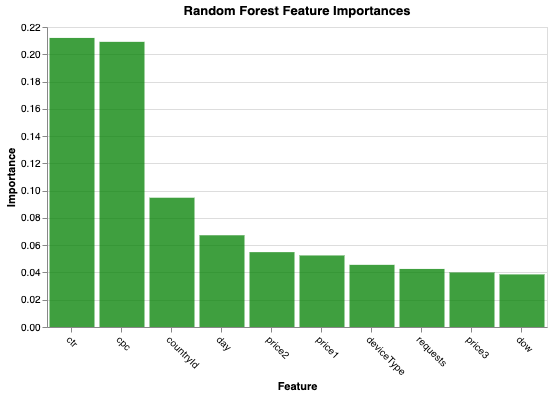

In [21]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'green')

We observe that the most important feature is `ctr`, followed by `cpc`, `countryid`, and `day`.

### 3.2 Hyperparameter Tunning

### Model evaluation strategy

We train our models on 4000 rows of training data and test them on 1000 rows of test data. We will use 5-fold cross-validation with 3 repetitions evaluation method for hyperparameter tuning.


#### Cross Validation

Cross validation is a well-recognised strategy to effectively reduce variability and to avoid overfitting. Hence it has been used throughout different stages of the project [2], such as when splitting the training and test dataset, when selecting the features, when tunning the parameters, when evaluating the prediction power of the algorithms and when comparing the performances across algorithms. There are variations of the cross validation method.
      
This project uses a repeated k-fold cross validation strategy since the target feature of the online advertising dataset is float numerical, and the repeated k-fold works well with the regression algorithms [2]. In simple words, k-fold cross validation means to partition the entire dataset into k equal-sized chunks, using one chunk as the test set while using the other k-1 chunks as the training set. Pick the test chunk in turn among the k chunks until all chunks have been acted as the test set. Finally take the average accruacy of these k tests as the final cross-validated accuracy. Usually k takes the value of 5 or 10, this project uses the 5-fold cross validation. The term “repeated” refers to repeat the 5-fold cross-validation procedure for 3 times (in the case of our project) with each repetition using a different partitioning of data. This is equivalent to totally 15 different ‘folds’ of data being used as the test set, which is a thoroughly randomisation of the training data as well. In addition, the repetition number cannot be set too high in order to minimise the issue of overfitting [4]. 
    
Keeping the same settings for all cross-validation procedures for every stage ensures a good foundation for a pair-wise performance comparison via the paired t-tests. Apart from the number of repetitions and folds, another parameter for the cross_val_score function in Python’s sklearn library is the ‘random state’. For example, to decide the best feature selection approach, keeping the random state same for all approaches will ensure every feature selection approach is fitted and tested on exactly the same data partitions. This means our experiments were conducted in a paired fashion and variability is reduced significantly compared to an independent fashion [1]. Similarly, for the evaluation stage, by keeping all parameters of the cross-validation same, different algorithms are able to be fitted and tested on same data partitions, and this builds a good foundation to use the paired t-test and produces comparable performances [4]. Besides, the hyperparameter tunning process (via both grid search and pipeline) is also cross-validated in a same fashion so as to avoid overfitting [2]. 

In [22]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=999)

### Algorithm 1: K-Nearest Neighbors (KNN) Regressor <a class="anchor" id="4.1"></a> 
 

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestRegressor
        from numpy import argsort
        model_rfi = RandomForestRegressor(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsRegressor())])

params_pipe_KNN = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                   'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'knn__p': [1, 2, 5]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_squared_error',
                           verbose=1) 

In [25]:
gs_pipe_KNN.fit(Data_scaled_sample_train, target_sample_train.ravel());

Fitting 15 folds for each of 90 candidates, totalling 1350 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-2)]: Done 1350 out of 1350 | elapsed: 20.0min finished


In [26]:
print(f'Best KNN model: {gs_pipe_KNN.best_params_}')

Best KNN model: {'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__n_features_': 20}


In [27]:
gs_pipe_KNN.best_score_

-1.8451612979113403

We observe that the best performance with 20 features selected by the random forest importance with 10 nearest neighbors and with *p*=1 for a negative mean squared error score of -1.8452. 


Let's find out the other combinations to see if the difference is rather significant or not. The code below is from [5] which make use of the function below to format the grid search output as a `Pandas` data frame.

In [28]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [29]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
83,-1.845161,0.359530,-1.352263,-2.694059,10.0,1.0,20.0
74,-1.850355,0.357448,-1.347758,-2.699726,9.0,1.0,20.0
65,-1.850679,0.350963,-1.354855,-2.701491,8.0,1.0,20.0
56,-1.869899,0.356541,-1.363617,-2.737554,7.0,1.0,20.0
47,-1.887592,0.354254,-1.403879,-2.725106,6.0,1.0,20.0


We observe that there is no much difference between the hyperparameter combinations when conditioned on the number of features selected.

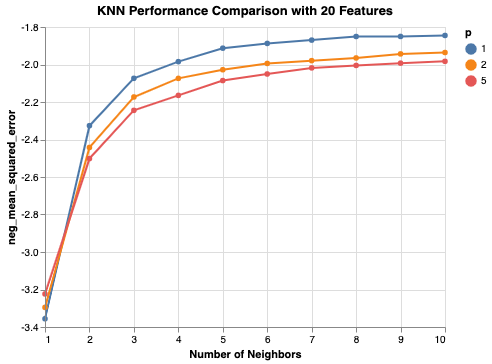

In [30]:
import altair as alt

results_KNN_20_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_KNN_20_features, 
          title='KNN Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='neg_mean_squared_error', aggregate='average', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

### Algorithm 2: Decision Tree (DT) Regressor<a class="anchor" id="4.2"></a> 

In [31]:
from sklearn.tree import DecisionTreeRegressor

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeRegressor(criterion='mse'))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                  'dt__max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                  'dt__min_samples_split': [3, 5, 20, 30, 50, 100]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='neg_mean_squared_error',
                          verbose=1) 

In [32]:
gs_pipe_DT.fit(Data_unscaled_sample_train, target_sample_train.ravel());

Fitting 15 folds for each of 144 candidates, totalling 2160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-2)]: Done 1786 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-2)]: Done 2160 out of 2160 | elapsed: 24.3min finished


In [33]:
print(f'Best DT model: {gs_pipe_DT.best_params_}')

Best DT model: {'dt__max_depth': 7, 'dt__min_samples_split': 20, 'rfi_fs__n_features_': 10}


In [34]:
gs_pipe_DT.best_score_

-1.503522064093012

The best DT has a maximum depth of 7 and minimum split value of 20 samples with a negative mean squared error score of -1.5035 with 10 features selected by the random forest importance.  

In [35]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
43,-1.503522,0.257684,-1.161103,-2.070725,7.0,20.0,10.0
61,-1.505658,0.262290,-1.186977,-2.119291,8.0,20.0,10.0
80,-1.509458,0.274132,-1.120377,-2.107705,9.0,20.0,20.0
64,-1.509675,0.267705,-1.150778,-2.131398,8.0,30.0,10.0
46,-1.512278,0.265000,-1.150021,-2.099999,7.0,30.0,10.0


We observe that there is no much difference between the hyperparameter combinations except the number of features selected by decision tree regressor. Most of the hyperparameter combinations show that this regressor perform better with 10 features.

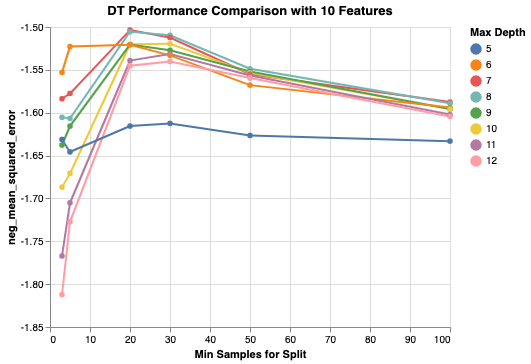

In [36]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='neg_mean_squared_error', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

### Algorithm 3: Random Forest (RF) Regressor<a class="anchor" id="4.3"></a> 

In [37]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestRegressor())])

params_pipe_rf = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                  'rf__max_depth': [5, 6, 7, 8, 9, 10, 12],
                  'rf__min_samples_split': [5, 20, 30, 50, 100]}


gs_pipe_rf = GridSearchCV(estimator=pipe_rf, 
                          param_grid=params_pipe_rf, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='neg_mean_squared_error',
                          verbose=1) 

gs_pipe_rf.fit(Data_unscaled_sample_train, target_sample_train.ravel());

Fitting 15 folds for each of 105 candidates, totalling 1575 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-2)]: Done 1575 out of 1575 | elapsed: 17.2min finished
/Users/shelneegan/Desktop/anaconda2/envs/Python3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
print(f'Best Random Forest model: {gs_pipe_rf.best_params_}')

Best Random Forest model: {'rf__max_depth': 9, 'rf__min_samples_split': 5, 'rfi_fs__n_features_': 20}


In [39]:
gs_pipe_rf.best_score_

-1.2293599102773887

The best RF has a maximum depth of 9 and minimum split value of 5 samples with a negative mean squared error socre of -1.2294 with 20 features selected by the random forest importance. 

In [40]:
results_rf = get_search_results(gs_pipe_rf)
results_rf.head()

,mean_score,std_score,max_score,min_score,rf__max_depth,rf__min_samples_split,rfi_fs__n_features_
62,-1.229360,0.273635,-0.799186,-2.003752,9.0,5.0,20.0
47,-1.232260,0.284722,-0.882142,-2.077756,8.0,5.0,20.0
77,-1.239613,0.253684,-0.807771,-1.953193,10.0,5.0,20.0
61,-1.241308,0.275742,-0.809190,-2.004117,9.0,5.0,10.0
92,-1.242166,0.271626,-0.744337,-1.952091,12.0,5.0,20.0


We observe that there is no much difference between the hyperparameter combinations except the number of features selected by Random Forest Regression. Most of the hyperparameter combinations show that this regressor perform better with 20 features.

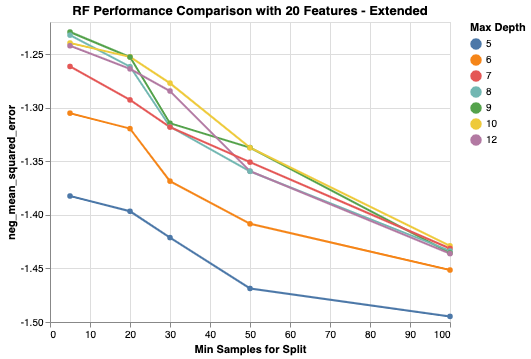

In [41]:
results_rf_20_features = results_rf[results_rf['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_rf_20_features, 
          title='RF Performance Comparison with 20 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('rf__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='neg_mean_squared_error', scale=alt.Scale(zero=False)),
    alt.Color('rf__max_depth:N', title='Max Depth')
)




### 3.3  Performance Evaluation & Analysis of Each Regressor Algorithm

First, we import the modules required to build a KNN, DT and RF model.

#### Evaluating KNN model

In [42]:
knn_regressor = KNeighborsRegressor(n_neighbors = 10, p = 1)
knn_regressor.fit(Data_scaled_sample_train, target_sample_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=1,
          weights='uniform')

To compute MSE, we need to predict on the test set first.

In [43]:
t_pred_knn = knn_regressor.predict(Data_scaled_sample_test)

Then, import `mean_squared_error` from `sklearn.metrics` module and compute MSE using the predicted and test target feature values.

In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(target_sample_test, t_pred_knn)
print(f'MSE of KNN is: {mse}')

MSE of KNN is: 1.1740029699339152


It is more intuitive to examine the root of MSE, which is denoted by RMSE, rather than MSE itself as RMSE is in the same units as the target feature.

In [45]:
np.sqrt(mse)

1.0835141761573381

We observe that our KNN regressor achieves a RMSE value of 1.08 for the Online Advertising dataset.

#### Evaluating DT model

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth = 7, min_samples_split = 20, random_state = 999)
dt_regressor.fit(Data_unscaled_sample_train, target_sample_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=999, splitter='best')

In [47]:
t_pred_dt = dt_regressor.predict(Data_unscaled_sample_test)

mse = mean_squared_error(target_sample_test, t_pred_dt)
print(f'MSE of Decision Tree is: {mse}')

MSE of Decision Tree is: 1.18840203847408


In [48]:
np.sqrt(mse)

1.0901385409543505

We observe that our Decision Tree regressor achieves a RMSE value of 1.09 for the Online Advertising dataset.

#### Evaluating Random Forest Regresison model

In [49]:
rf_regressor = RandomForestRegressor(max_depth = 9, min_samples_split = 5, random_state = 999)
rf_regressor.fit(Data_unscaled_sample_train, target_sample_train.ravel())

/Users/shelneegan/Desktop/anaconda2/envs/Python3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=999, verbose=0, warm_start=False)

In [50]:
t_pred_rf = rf_regressor.predict(Data_unscaled_sample_test)

mse = mean_squared_error(target_sample_test, t_pred_rf)
print(f'MSE of Random Forest Regression is: {mse}')

MSE of Random Forest Regression is: 0.8615682545274037


In [51]:
np.sqrt(mse)

0.9282070106002237

We observe that our Random Forest regressor achieves a RMSE value of 0.9282 for the Online Advertising dataset.

RF has the lowest test RMSE error, compared to DT and KNN, this implies (optimised) RF is more accurate in predicting the revenue.


We also want consider the following metrics to evaluate models based on the test set apart from `MSE`:
* Mean Absolute Error (MAE)
* $R^{2}$

Let's check whether RF is still outperforms KNN and DT if we evaluate them using MAE or $R^{2}$.

In [52]:
from sklearn import metrics
t_pred_knn = knn_regressor.predict(Data_scaled_sample_test)
mae = metrics.mean_absolute_error(target_sample_test, t_pred_knn)
r2 = metrics.r2_score(target_sample_test, t_pred_knn)
print(f'MAE and r-squared KNN are: {mae}, {r2}')

MAE and r-squared KNN are: 0.6390572422752, 0.08656481785217784


In [53]:
t_pred_dt = dt_regressor.predict(Data_unscaled_sample_test)
mae = metrics.mean_absolute_error(target_sample_test, t_pred_dt)
r2 = metrics.r2_score(target_sample_test, t_pred_dt)
print(f'MAE and r-squared DT are: {mae}, {r2}')

MAE and r-squared DT are: 0.5623844136918128, 0.0753615959425391


In [54]:
t_pred_rf = rf_regressor.predict(Data_unscaled_sample_test)
mae = metrics.mean_absolute_error(target_sample_test, t_pred_rf)
r2 = metrics.r2_score(target_sample_test, t_pred_rf)
print(f'MAE and r-squared RF are: {mae}, {r2}')

MAE and r-squared RF are: 0.4840455283455391, 0.32965522604144704


RF has a lower test MAE error and a higher $R^{2}$ than KNN and DT. Thus, RF outperforms KNN and DT with respect to these two metrics as well. 

In practice though, using a different metric during hyperparameter tuning will likely result in a different model evaluation. Recall that we used MSE to optimize the hyperparameters of each model. In our case, it is just a coincidence that RF has lower MSE and MAE values and a higher $R^2$ than KNN and DT. In summary, whatever metric you want to optimize, you should use the same metric for both hyperparameter tuning and model evaluation. That is, you should avoid using different metrics for tuning and evaluation [3]. 

## 4. Performance Comparison<a class="anchor" id="5"></a> 

Since cross validation is a random process, we perform pairwise t-tests to determine if any differecne between the performance of any two best regressors is statistically significant.

First, we perform 10-fold cross validation on each best model without any repetitions.
Second, we conduct a paired t-test for the negative mean squared error score between the following model combinations:

* KNN vs. DT,
* KNN vs. RF and
* DT vs. RF



In [55]:
from sklearn.model_selection import cross_val_score, KFold

cv_method_ttest = KFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_scaled_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='neg_mean_squared_error')
cv_results_KNN.mean()

-1.2669385742730879

In [56]:


cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_unscaled_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='neg_mean_squared_error')
cv_results_DT.mean()

-1.16560437899007

In [57]:


cv_results_RF = cross_val_score(estimator=gs_pipe_rf.best_estimator_,
                                X=Data_unscaled_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='neg_mean_squared_error')
cv_results_RF.mean()

-1.1258238889951513

In [58]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT).pvalue.round(4))
print(stats.ttest_rel(cv_results_RF, cv_results_KNN).pvalue.round(4))
print(stats.ttest_rel(cv_results_RF, cv_results_DT).pvalue.round(4))

0.3419
0.048
0.5952


A p-value smaller than 0.05 indicates a statistical difference. Looking at these results, we conclude that at a 95% significance level, Random Forest Regression is statistically the best model in this competition (in terms of `neg_mean_squared_error`) when compared on the **test data**.

Hence, the paired t-test shows that only the difference in performance between the Random Forest and kNN regressors is statistically significant, which implies that Random Forest indeed outperforms the kNN regressor in terms of the mean squared error metric. Meanwhile the other two p-values are greater than 0.05, suggesting that the difference in the mean squared error metric values within the other two pairs of algorithms are statistically insignificant, which can be interpreted as that neither kNN nor Random Forest have really outperformed the decision tree regressor. 

## 5. Critique of our approach<a class="anchor" id="6"></a> 


#### Limitations 

Our modeling strategy has few limitations. First, we only work with a small subset of the original dataset for shorter run times. Using small sample size may reduce the power of the prediction and the result may be less reliable. However, we still can train the model on the entire dataset to predict the target feature since we have obtained the optimal hyperparameters for our model. Second, we perform 10-fold cross validation on each best model without any repetitions before conducting a paired t-test when comparing the model performance. Since we have more than two regressors, we can use Turkey's post-hoc tests or its non-parametric counterpart for model comparison. Third, only one feature selection method is used since we perform feature selection and hyperparameter tuning in a pipeline. We can attempt different feature selection methods before fitting a model.

The RF regressors statistically outperforms the other two models. Hence, we can consider to improve this model by furthur expanding the hyperparameter search space by adding other parameters. Furthermore, we can examine and play around with the order of the terms and perform regularisation as part of the hyperparameter tuning to obtain a better model in the future. 

#### Strengths and Weaknesses

The strength of this project is that we only required to use scaled data for kNN algorithm, whereas another two algorithms are tree-based algoriths, and they can work well with unscaled data. The weakness of this project is we only work with same sample size of data.


## 6. Conclusion<a class="anchor" id="7"></a> 

The Random Forest Regression model with 20 features selected by the Random Forest Importance (RFI) produces the lowest negative mean squared error score on the training data. When evaluated on the test set, the Random Forest Regression model outperforms both k-Nearest Neighbor and Decision Tree models with respect to MSE score. Moreover, we discover that RF has the lowest test RMSE error, compared to DT and KNN, this indicates that RF is more accurate in predicting the revenue. On the other hand, we also detect that our models are slightly sensitive to the number of features as selected by RFI. However, working with 20 features (full feature set) is more preferable because most of the hyperparameter combinations show Random Forest Regression performs better with 20 features.

## Reference


[1] SK Part 2 - Feature Selection and Ranking, MATH2319 - Machine Learning @ RMIT University.

[2] SK Part 3 - Cross-Validation and Hyperparameter Tuning, MATH2319 - Machine Learning @ RMIT University

[3] SK Part 4 - Model Evaluation, MATH2319 - Machine Learning @ RMIT University

[4] SK Part 5 - Pipelines, Statistical Model Comparison, and Model Deployment, MATH2319 - Machine Learning @ RMIT University

[5] Case Study - Predicting Income Status, MATH2319- Machine Learning @ RMIT University. 

[6] Kelleher,J., Namee,B. & D'Arcy,A. (2015). Fundamentals of machine learning for predicitve data analytics, Chapter 6: Probability-based Learning. The MIT Press. 

[7] Kelleher,J., Namee,B. & D'Arcy,A. (2015). Fundamentals of machine learning for predicitve data analytics, Chapter 4: Information-based Learning. The MIT Press. 

[8] Hale.J. (2019). Scale, Standardize, or Normalize with Scikit-Learn. Retrieved from https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

[9] Asaithambi, S. (2017). Why, How and When to Scale your Features. Retrieved from https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

[10] Kelleher,J., Namee,B. & D'Arcy,A. (2015). Fundamentals of machine learning for predicitve data analytics, Chapter 5: Similarity-based Learning. The MIT Press. 


